# Python in der Wissenschaft

1. Grosse Zahlen
- Boolsche Arithmetik
- Numerisch Differenzieren
- Funktionen graphisch darstellen
- Dichte der Primzahlen
- Lineare Algebra mit NumPy
- Wachstum
	- Unbegrenztes Wachstum
	- Begrenztes Wachstum
	- Logistisches Wachstum
	- Wachstum mit Gift
	- Wachstum mit Gift (optimistisches Modell)
- Diskrete Optimierung
	- Fermat-Punkt
	- Kranausleger
	- Hängende Kette

In [3]:
# Grosse Zahlen z.B. Fakultät 49
from math import factorial

factorial(200)

# float(factorial(49))

# 2**33*5**66


788657867364790503552363213932185062295135977687173263294742533244359449963403342920304284011984623904177212138919638830257642790242637105061926624952829931113462857270763317237396988943922445621451664240254033291864131227428294853277524242407573903240321257405579568660226031904170324062351700858796178922222789623703897374720000000000000000000000000000000000000000000000000

In [5]:
# Spiel mit dem Reiskorn und der Verdoppelung
# Wie lange muss ich spielen, bis ich mehr Reiskörner als Atome im Universum habe?

atome_im_universum = 10**82
r,z,s = 1,1,0
while (s < atome_im_universum):
    s += r
    r *= 2
    z += 1

print ("Nach %d Verdoppelungen haben wir %d Reiskörner"%(z,s))  



Nach 274 Verdoppelungen haben wir 15177100720513508366558296147058741458143803430094840009779784451085189728165691391 Reiskörner


### 2. Boolsche Arithmetik

Quelle http://www.checkio.org/mission/x-o-referee/

Tic-Tac-Toe, sometimes also known as Xs and Os, is a game for two players (X and O) who take turns marking the spaces in a 3×3 grid. The player who succeeds in placing three respective marks in a horizontal, vertical, or diagonal rows (NW-SE and NE-SW) wins the game.

But we will not be playing this game. You will be the referee for this games results. You are given a result of a game and you must determine if the game ends in a win or a draw as well as who will be the winner. Make sure to return "X" if the X-player wins and "O" if the O-player wins. If the game is a draw, return "D".

![im](https://checkio.s3.amazonaws.com/task/media/4abe068a7ce44b3a86828a8e17cad1b4/x-o-referee.png)

Input: A game result as a list of strings (unicode).

Output: "X", "O" or "D" as a string.

In [6]:
def checkio(game):
    # List of all possible sequences
    marks = game + \
            ["".join([row[i] for row in game]) for i in range(3)] + \
            ["".join([game[i][i] for i in range(3)])] + \
            ["".join([game[-(i+1)][i] for i in range(3)])]
            
    if "XXX" in marks:
        return "X"
    elif "OOO" in marks:
        return "O"
    else:
        return "D"
    


print checkio([
        "X.O",
        "XX.",
        "XOO"
    ])

print checkio([
        "OO.",
        "XOX",
        "XOX"
    ]) 

print checkio([
        "OOX",
        "XXO",
        "OXX"
    ])

X
O
D


## 3. Numerisch Differenzieren


$$
f'(x) = \lim_{h \to 0} \frac {f(x+h)-f(x-h)}{2h}
$$

In [11]:
from math import pi,exp,sqrt,sin,cos,tan,log

def ableitung(x,f,h=0.00001):
 return (f(x+h)-f(x-h))/(2*h)

def f1(x):
 return x*x*x

x0 = 2

print "Die Ableitung von y=f(x) \
an der Stelle %g beträgt %g" % (x0,ableitung(x0,f1)) 

Die Ableitung von y=f(x) an der Stelle 2 beträgt 12


## 4. Funktionen graphisch darstellen, Daten plotten

### Matplotlib


[Matplotlib Tutorial](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb)

Weitere Beispiele: [http://matplotlib.org/gallery.html](http://matplotlib.org/gallery.html)


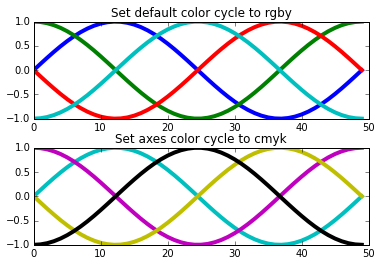

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0, 2 * np.pi)
offsets = np.linspace(0, 2*np.pi, 4, endpoint=False)
# Create array with shifted-sine curve along each column
yy = np.transpose([np.sin(x + phi) for phi in offsets])

plt.rc("lines", linewidth=4)
fig, (ax0, ax1)  = plt.subplots(nrows=2)

plt.rc("axes", color_cycle=["r", "g", "b", "y"])
ax0.plot(yy)
ax0.set_title("Set default color cycle to rgby")

ax1.set_color_cycle(["c", "m", "y", "k"])
ax1.plot(yy)
ax1.set_title("Set axes color cycle to cmyk")

# Tweak spacing between subplots to prevent labels from overlapping
plt.subplots_adjust(hspace=0.3)
plt.show()

## 5. Dichte der Primzahlen

In [3]:
N = 10**7# Obere Grenze (N < 10**8)

prim = [True]*(N+1)

# Sieb des Eratosthenes
for i in range(2,N+1):
    if prim[i]:
        for j in range(2*i,N+1,i):
            prim[j] = False

prim[0]=False
prim[1]=False

# Primzahlen in Intervall
def primes (start,end):
    if end > N:
        end = N
    PN = []
    for i in range(start,end):
        if prim[i]:
            PN.append(i)
    return PN
    

# Anzahl Primzahlen in einem Intervall
def nrprimes (start,end):
    if end > N:
        end = N
    return sum(prim[start:end])

print primes(5,431)
print nrprimes(5,31)


[5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229, 233, 239, 241, 251, 257, 263, 269, 271, 277, 281, 283, 293, 307, 311, 313, 317, 331, 337, 347, 349, 353, 359, 367, 373, 379, 383, 389, 397, 401, 409, 419, 421]
8


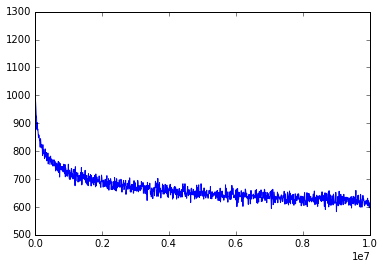

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Anzahl Primzahlen in einem Intervall / Bereich
be = 10**4 # Intervall / Bereich
if be > N:
    be = N

d=[] 

for j in range(N/be):
    d.append(nrprimes(j*be,(j+1)*be))

# x-Skala gleichmaessig von 0 bis N
x = np.linspace(0, N, N/be)
y = np.array(d)
plt.plot(x,y)
plt.show() 



## 6. Lineare Algebra mit numpy

[http://www.python-kurs.eu/numpy.php](http://www.python-kurs.eu/numpy.php)

In [16]:
from numpy import *
from numpy.linalg import *

a = array([[1.0, 2.0], [3.0, 4.0]])
#a = array([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0],])

print a


[[ 1.  2.  3.]
 [ 4.  5.  6.]
 [ 7.  8.  9.]]


In [19]:
# Transponierte Matrix
a.transpose()

array([[ 1.,  4.,  7.],
       [ 2.,  5.,  8.],
       [ 3.,  6.,  9.]])

In [20]:
# Invertierte Matrix
inv(a)

array([[ -4.50359963e+15,   9.00719925e+15,  -4.50359963e+15],
       [  9.00719925e+15,  -1.80143985e+16,   9.00719925e+15],
       [ -4.50359963e+15,   9.00719925e+15,  -4.50359963e+15]])

In [21]:
# Eigenwerte und Eigenvektoren

eig(a)

(array([  1.61168440e+01,  -1.11684397e+00,  -1.30367773e-15]),
 array([[-0.23197069, -0.78583024,  0.40824829],
        [-0.52532209, -0.08675134, -0.81649658],
        [-0.8186735 ,  0.61232756,  0.40824829]]))

In [23]:
# Lösen eine lienaren Gleichungsystem
# z.B.  A x = B
# pragmatisch: x = A-1B
    
A = array([[2.0, 3.0, 4.0], [3.0, -2.0, -1.0], [5.0, 4.0, 3.0]])
BT = array([1.4,1.2,1.4]) 

X = np.dot(inv(A),BT.transpose())
print(X)


[ 0.3 -0.4  0.5]


## 7. Wachstum / Populationsdynamik 
    - Unbegrenztes Wachstum
    - Begrenztes Wachstum
    - Logistisches Wachstum
    - Wachstum mit Gift
    - Wachstum mit Gift optimistischeres Modell
    
Quelle: [Henning Körner, Oldenburg: Populationsdynamik, ISTRON Band 6 2000](http://github.com/mgje/Python-Mathematik-Beispiele/blob/master/Mathematik_Artikel/Populationsdynamik_koerner_Istron6.pdf?raw=true)


[Link auf den Artikel](http://github.com/mgje/Python-Mathematik-Beispiele/blob/master/Mathematik_Artikel/Populationsdynamik_koerner_Istron6.pdf?raw=true)

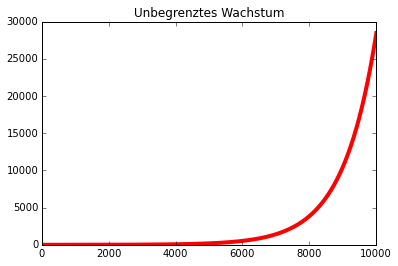

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt

# Wachstum 1 Promille
w=0.001
def f(x):
   return x+w*x

# x_n+1 = x_n+w*x_n
def genPopulation(x0,n):
   x=[x0]
   # calculate 1..n-1 values
   for i in range(1,n):
      tmp = f(x[i-1])
      x.append(tmp)
   return x

x0 = 1.3
popul=genPopulation(x0,10000)
plt.title("Unbegrenztes Wachstum")
plt.plot(range(len(popul)),popul)
plt.show()

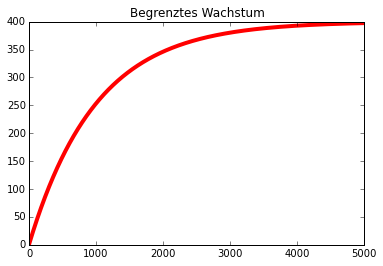

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

w=0.001
G=400.0
def f(x):
   return x+w*(G-x)

# x_n+1 = x_n+w*(G-x_n)
def genPopulation(x0,n):
   x=[x0]
   # calculate 1..n-1 values
   for i in range(1,n):
      tmp = f(x[i-1])
      x.append(tmp)
   return x

x0 = 1.3
popul=genPopulation(x0,5000)
plt.title("Begrenztes Wachstum")
plt.plot(range(len(popul)),popul)
plt.show()

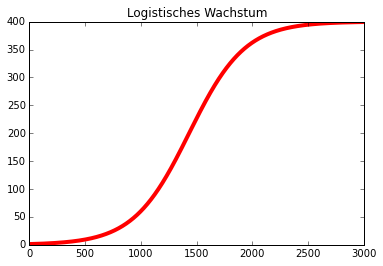

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt

w=0.00001
G=400.0
def f(x):
    return x+w*x*(G-x)

# x_n+1 = x_n+w*x_n*(G-x_n)
def genPopulation(x0,n):
    x=[x0]
    # calculate 1..n-1 values
    for i in range(1,n):
        tmp = f(x[i-1])
        x.append(tmp)
    return x

x0 = 1.3
popul=genPopulation(x0,3000)
plt.title("Logistisches Wachstum")
plt.plot(range(len(popul)),popul)
plt.show()


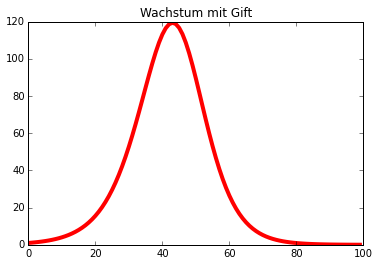

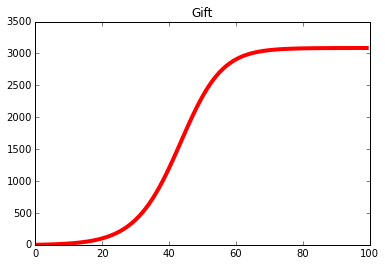

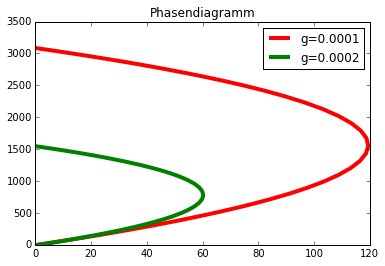

In [49]:
%matplotlib inline
import matplotlib.pyplot as plt

k=1.15
g=0.0
def f(x,y):
    return (k-g*y)*x

# x_n+1 = (k-g*y_n)*x_n
# y_n+1 = y_n+x_n

def genPopulation(x0,n):
    x=[x0]
    y=[0]
    # calculate 1..n-1 values
    for i in range(1,n):
        tmp = f(x[i-1],y[i-1])
        x.append(tmp)
        tmp2 = y[i-1]+x[i-1]
        y.append(tmp2)
    return x,y

x0 = 1.0
g=0.0001

popul,gift = genPopulation(x0,100)

plt.title("Wachstum mit Gift")
plt.plot(range(len(popul)),popul)
plt.show()
plt.title("Gift")
plt.plot(range(len(gift)),gift)
plt.show()
plt.title("Phasendiagramm")

g=0.0002
popul2,gift2 = genPopulation(x0,100)
plt.plot(popul,gift,label='g=0.0001')
plt.plot(popul2,gift2,label='g=0.0002')
plt.legend()
plt.show()


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def f(x,y):
    return (k-g*y)*x

# x_n+1 = (k-g*y_n)*x_n
# y_n+1 = y_n+x_n

def genPopulation(x0,n):
    x,y=[x0],[0]
    # calculate 1..n-1 values
    for i in range(1,n):
        tmp = f(x[i-1],y[i-1])
        x.append(tmp)
        tmp2 = m*y[i-1]+x[i-1]
        y.append(tmp2)
    return x,y

# Parameter
k,m,g=1.15,0.95,0.0001
x0 = 1.0

popul,gift=genPopulation(x0,400)
plt.title("Wachstum mit Gift")
plt.plot(range(len(popul)),popul)
plt.show()

plt.title("Gift")
plt.plot(range(len(gift)),gift)
#plt.savefig('gift.pdf')
plt.show()
plt.title("Phasendiagramm")

g=0.0002
popul2,gift2=genPopulation(x0,400)
plt.plot(popul,gift,label="g=0.0001")
plt.plot(popul2,gift2,label="g=0.0002")
plt.legend()
plt.show()


## 8. Numerische Optimierung
    - Fermat-Punkt
    - Kranausleger
    - Hängende Kette
    
GDM Beitrag zum Fermat-Problem, Linnemann, Guggisberg, Trachsler, GDM 2015 Basel

__[HTML-5 Präsentation](http://mgje.github.io/presentations/GDM2015/#/)__


### Fermat-Punkt

![fermat](media/fermat.png)

[Interaktive App (GeoGebra)](http://tube.geogebra.org/m/52934)

In [5]:
from math import *

def distanz(a,b):
    return sqrt((a[0]-b[0])**2+(a[1]-b[1])**2)
    
def schwerpunkt(punkte):
    x0=y0=0.0
    n = len(punkte)
    for P in punkte:
        x0=x0+P[0]
        y0=y0+P[1]
    return (x0/n,y0/n)

def WeiszmanIteration(P, punkte):
    """
    Return a new approximation to the geometric median 
    of `points` by applying one iteration of Weiszfeld's 
    algorithm to the old appromixation P.
    """
    W = x = y = 0.0
    for Q in punkte:
        d = distanz(P, Q)
        if d != 0:
            w = 1.0 / d
            W += w
            x += Q[0] * w
            y += Q[1] * w
    return x / W, y / W


def fermatpunkt(punkte, epsilon):
    """
    Return an approximation to the geometric median for 
    `points`. Start with the centroid and apply Weiszfeld's 
    algorithm until the distance between steps is less 
    than `epsilon`.
    """
    P = schwerpunkt(punkte)
    while True:
        Q = WeiszmanIteration(P, punkte)
        if distanz(P, Q) < epsilon:
            return Q
        P = Q
        
# Initialisierung der Punkte A-F        
Punkte = []
A = [3,10]
Punkte.append(A)    
B = [4,9]
Punkte.append(B) 
C = [6,10]
Punkte.append(C) 
D = [6,6]
Punkte.append(D) 
E = [10,7]
Punkte.append(E) 
F = [4,7]
Punkte.append(F) 

print Punkte
print schwerpunkt(Punkte)   
print fermatpunkt(Punkte, 0.01) 

[[3, 10], [4, 9], [6, 10], [6, 6], [10, 7], [4, 7]]
(5.5, 8.166666666666666)
(4.780419173015791, 8.426417438763021)


### Kranausleger & hängende Kette

Quelle: [Artikel, Reinhard Oldenburg: Numerische Optimierung, ISTRON Band 9 (2006)](https://github.com/mgje/Python-Mathematik-Beispiele/blob/master/Mathematik_Artikel/Numerische_Optimierung_schneller_weg_zu_modellbildung_oldenburg_istron9.pdf?raw=true)

Optimization terminated successfully.
         Current function value: -0.505491
         Iterations: 1348
         Function evaluations: 1944
[ 0.93936459 -0.09318279  1.88374721 -0.28396385  2.84155574 -0.50832632
  2.03158497  0.68493704  1.03122666  0.87995184]


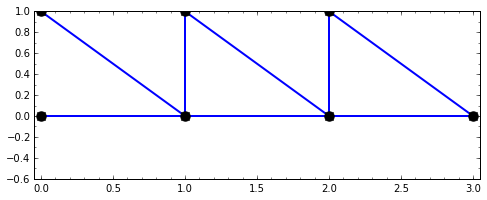

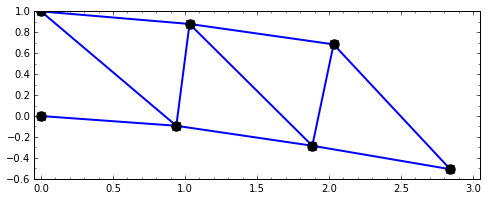

In [58]:
#  Kranausleger
#  2D coordinates of Mesh are stored in a 1-dim vector
#  X =[x0,y0,x1,y1,...]
# (c) Martin Guggisberg 2012
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import scipy.optimize as optimize
from math import sqrt
import matplotlib.pyplot as pp
# Geometrie des Problems / Knoten 0 und 1 werden fixiert.
# 1  6  5
#
# 0  2  3  4  
# Gewicht haengt an Knoten 4 der y-Wert steht an der Stelle 7   

def feder(i,j,K,L,X):
    """Input Knoten i,j ; Federkonstante K ; Laenge L
        Rueckgabe Energie in der Feder"""
    xi = 2*i
    xj = 2*j 
    return 0.5*K*(L-sqrt((X[xi]-X[xj])**2+(X[xi+1]-X[xj+1])**2))**2
                      
def gesEnergie(x,x_fix,m):
    """Alle Verstrebungen des Kranauslegers und das Gewicht am Ende 
   tragen zur Gesamtenergie bei """
    #Gitterpunkte als Vektor x,y, ...
    X=x_fix[:]
    for el in x:
        X.append(el)
    # Geometrie
    #Horizontal unten
    e=feder(0,2,100.0,1.0,X)
    e+=feder(2,3,100.0,1.0,X)
    e+=feder(3,4,100.0,1.0,X)
    #Horizontal oben
    e+=feder(1,6,100.0,1.0,X)
    e+=feder(6,5,100.0,1.0,X)
    #Vertikal
    e+=feder(6,2,100.0,1.0,X)
    e+=feder(5,3,100.0,1.0,X)
    #Schraeg
    e+=feder(1,2,100.0,1.414,X)
    e+=feder(6,3,100.0,1.414,X)
    e+=feder(5,4,100.0,1.414,X)
    e+=9.81*m*X[9]
    return e

def plotGelenk(i,j,x):
    #print([x[i*2],x[j*2]])
    pp.plot([x[i*2],x[j*2]],[x[i*2+1],x[j*2+1]],linewidth=2, color='b')

def plotKnoten(X):
    #Knoten x_ y_
    x_=[]
    y_=[]
    for i in range(0,len(X),2):
        x_.append(X[i])
        y_.append(X[i+1])
    pp.plot(x_,y_,'bo', color='k', markersize=10)
    
def plotAusleger(X):
    fig = pp.figure(2,figsize=(8,3))
    ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.05,3.05), ylim=(-0.6,1.00))
    ax.xaxis.set_minor_locator(MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    plotGelenk(0,2,X)
    plotGelenk(2,3,X)
    plotGelenk(3,4,X)
    plotGelenk(1,6,X)
    plotGelenk(6,5,X)
    plotGelenk(6,2,X)
    plotGelenk(5,3,X)
    plotGelenk(1,2,X)
    plotGelenk(6,3,X)
    plotGelenk(5,4,X)
    plotKnoten(X)

# Fixierte Knoten 0,1
x_fix=[0.0,0.0,0.0,1.0]

#  Variable Knoten 2,3,4,5,6
x0=[1.0,0.0,2.0,0.0,3.0,0.0,2.0,1.0,1.0,1.0]

# Vernuenftige Massen liegen im Bereich 0.001 bis 0.2
m=0.2
xopt = optimize.fmin(gesEnergie,x0,args=(x_fix,m), xtol=1e-6, disp=True)
print(xopt)

# Plot Kranausleger ohne Last 
X=x_fix[:]
for el in x0:
    X.append(el)

plotAusleger(X)
pp.show()

# Plot Kranausleger mit Last 
X=x_fix[:]
for el in xopt:
    X.append(el)

plotAusleger(X)
pp.show()


17
[0.5882352941176471, -0.6194760257043987, 1.1764705882352942, -1.311517548195749, 1.7647058823529411, -1.9046959960454768, 2.3529411764705883, -2.399011369253584, 2.9411764705882355, -2.7944636678200694, 3.5294117647058827, -3.0910528917449334, 4.11764705882353, -3.288779041028176, 4.705882352941177, -3.3876421156697973, 5.294117647058823, -3.3876421156697973, 5.88235294117647, -3.288779041028176, 6.470588235294117, -3.0910528917449334, 7.058823529411764, -2.79446366782007, 7.64705882352941, -2.399011369253585, 8.235294117647058, -1.9046959960454777, 8.823529411764705, -1.31151754819575, 9.411764705882351, -0.6194760257044014]
Optimization terminated successfully.
         Current function value: -25.624927
         Iterations: 113476
         Function evaluations: 133964
[ 0.46584885 -0.60390644  0.9255396  -1.21097762  1.4303735  -1.77983538
  1.97663541 -2.30950563  2.56156023 -2.79611532  3.21316966 -3.18925151
  3.91841578 -3.47627818  4.66205072 -3.63584417  5.42347102 -3.6393

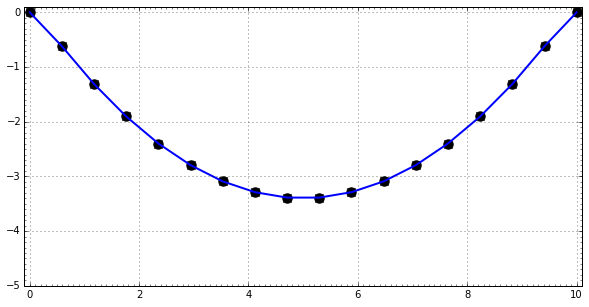

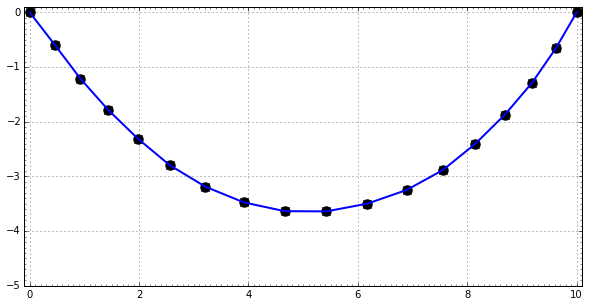

In [6]:
#  hängende Kette
#  (c) 2012 Martin Guggisberg

import scipy.optimize as optimize
from math import sqrt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as pp
import random

# Aufhaenge Punkte P1,P2
P1=[0.0,0.0]
P2=[10.0,0.0]
#Anzahl Glieder
N=17
#Laenge der Kette
L=12.0

#Laenge eines Glieds
lg = L/N

# Paramtrisierung
# Fuer N=5 Glieder
# F-x0-x1-x2-x3-F
# 4 (N-1) freie Koordinaten 

def potEnergie(X):
    w = []
    w.append(P1[0])
    w.append(P1[1])
    for el in X:
        w.append(el)
    w.append(P2[0])
    w.append(P2[1])
    #Sum pot energy of every element
    
    sum=0.0
    for i in range(N):
        x=2*i
        y=2*i+1
        # ll calculated length, lg correct length
        ll =sqrt((w[x]-w[x+2])**2+(w[y]-w[y+2])**2)
        sum+=ll*(w[y]+w[y+2])/2.0+70*(lg-ll)**2
        #print lg,ll
    return sum

def drawfig(X):
    fig = pp.figure(1,figsize=(10,5))
    ax = fig.add_subplot(111, autoscale_on=False, xlim=(-0.1,10.1), ylim=(-5.0,0.1))
    ax.xaxis.set_minor_locator(MultipleLocator(0.1))
    ax.yaxis.set_minor_locator(MultipleLocator(0.1))
    x_=[P1[0]]
    y_=[P1[1]]
    for i in range(N-1):
        x=2*i
        y=2*i+1
        x_.append(X[x])
        y_.append(X[y])
    x_.append(P2[0])
    y_.append(P2[1])   
    
    pp.plot(x_,y_,"bo", color="k", markersize=10)
    pp.plot(x_,y_,linewidth=2, color="b")
    pp.grid()
    pp.show()

#Generate Initial Vektor
x0=[]
d = 10.0/N
pos =d
print(N)

#Parabol Approximation
for i in range(N-1):
    x0.append(pos)
    x0.append((pos-5)**2/7-3.4)
    pos +=d

print(x0)

xopt = optimize.fmin(potEnergie,x0, xtol=1e-7, disp=True,maxiter=10**6, maxfun=9000000)
print(xopt)
drawfig(x0)
drawfig(xopt)

